# LAB 1 REGRESION LINEAL
## Univ. Villca Jaita Lino Fernando - Ing. Cs. de la Computación

En  este laboratorio utilizaremos el dataset: **Vehicle Sales Data** que nos permitira predecir el valor de venta de un vehiculo a medio uso.
*   https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data
*   Formato: .csv



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

#importando pandas para poder manejar nuestro dataset
import pandas as pd

In [4]:
# Cargar el dataset
data = pd.read_csv('/content/drive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL 2024/LABORATORIOS/LAB 1/car_prices.csv', delimiter=',')

#Eliminamos los ejemplos donde alguna caracteristica este vacia en alguna columna
data.dropna(inplace=True)
#Muestra el numero de ejemplos que contegan cada caracteristica
data.count()

year            472325
make            472325
model           472325
trim            472325
body            472325
transmission    472325
vin             472325
state           472325
condition       472325
odometer        472325
color           472325
interior        472325
seller          472325
mmr             472325
sellingprice    472325
saledate        472325
dtype: int64

In [5]:
# Convertir columnas categóricas a numéricas (astype('category').cat.codes, convierte las categorías en valores numéricos únicos.)
# Luego, cat.codes extrae estos códigos numéricos asignados a cada categoría.
data['year'] = data['year'].astype('category').cat.codes
data['make'] = data['make'].astype('category').cat.codes
data['model'] = data['model'].astype('category').cat.codes
data['trim'] = data['trim'].astype('category').cat.codes
data['body'] = data['body'].astype('category').cat.codes
data['transmission'] = data['transmission'].astype('category').cat.codes
data['vin'] = data['vin'].astype('category').cat.codes
data['state'] = data['state'].astype('category').cat.codes
data['color'] = data['color'].astype('category').cat.codes
data['interior'] = data['interior'].astype('category').cat.codes
data['seller'] = data['seller'].astype('category').cat.codes
data['saledate'] = data['saledate'].astype('category').cat.codes

# Verificar que las columnas categóricas se han convertido a numéricas
print(data.head())
print(data.dtypes)

   year  make  model  trim  body  transmission     vin  state  condition  \
0    25    24    637   818    35             0  342710      2        5.0   
1    25    24    637   818    35             0  342704      2        5.0   
2    24     3      8   253    36             0  430112      2       45.0   
3    25    51    575  1212    36             0  462800      2       41.0   
4    24     3     33   335    36             0  431048      2       43.0   

   odometer  color  interior  seller      mmr  sellingprice  saledate  
0   16639.0     17         1    5943  20500.0       21500.0      1675  
1    9393.0     17         0    5943  20800.0       21500.0      1675  
2    1331.0      7         1    4090  31900.0       30000.0      1085  
3   14282.0     17         1   11541  27500.0       27750.0      1176  
4    2641.0      7         1    4090  66000.0       67000.0       743  
year               int8
make               int8
model             int16
trim              int16
body           

In [99]:
#ajustamos el dataset eliminas la ultima columna del dataset que es datesale (Fecha de venta porque en nuestro ejemplo no es importante considerar)
#data.drop(columns=['saledate'], inplace=True)
# Seleccionar las columnas deseadas en X
X = data.loc[:, 'year':'mmr']
X_test = data.loc[:, 'year':'mmr']

# Eliminar la columna 'vin' (Vehicle Identification Number) porque no importa en nuestro caso la matricula de identificacion
X.drop(columns=['vin'], inplace=True)
X_test.drop(columns=['vin'], inplace=True)
# Seleccionar la columna 'sellingprice' en y
y = data['sellingprice']
y_test = data['sellingprice']
# Obtener el tamaño de y
m = y.size

print(X)
print(y)
print(m)

        year  make  model  trim  body  transmission  state  condition  \
0         25    24    637   818    35             0      2        5.0   
1         25    24    637   818    35             0      2        5.0   
2         24     3      8   253    36             0      2       45.0   
3         25    51    575  1212    36             0      2       41.0   
4         24     3     33   335    36             0      2       43.0   
...      ...   ...    ...   ...   ...           ...    ...        ...   
558831    21     3     25   316    36             0      4       39.0   
558833    22    41      6   926    11             0     32        5.0   
558834    22     3    722  1489    35             0      2       48.0   
558835    25    36     63   102    76             0      5       38.0   
558836    24    14    256  1394    38             0      2       34.0   

        odometer  color  interior  seller      mmr  
0        16639.0     17         1    5943  20500.0  
1         9393.0 

In [7]:
#normalizar es convertir a la misma escala los datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [8]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

        year  make  model  trim  body  transmission  state  condition  \
0         25    24    637   818    35             0      2        5.0   
1         25    24    637   818    35             0      2        5.0   
2         24     3      8   253    36             0      2       45.0   
3         25    51    575  1212    36             0      2       41.0   
4         24     3     33   335    36             0      2       43.0   
...      ...   ...    ...   ...   ...           ...    ...        ...   
558831    21     3     25   316    36             0      4       39.0   
558833    22    41      6   926    11             0     32        5.0   
558834    22     3    722  1489    35             0      2       48.0   
558835    25    36     63   102    76             0      5       38.0   
558836    24    14    256  1394    38             0      2       34.0   

        odometer  color  interior  seller      mmr  
0        16639.0     17         1    5943  20500.0  
1         9393.0 

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [9]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [10]:
print(X)

[[ 1.          1.25296605  0.1612514  ... -0.7031     -0.01448694
   0.69899159]
 [ 1.          1.25296605  0.1612514  ... -0.94682523 -0.01448694
   0.7304638 ]
 [ 1.          0.99133298 -1.30475879 ... -0.7031     -0.55403664
   1.89493555]
 ...
 [ 1.          0.46806686 -1.30475879 ... -0.7031     -0.55403664
   1.67463009]
 [ 1.          1.25296605  0.99897151 ... -0.7031     -0.64197188
   0.13249182]
 [ 1.          0.99133298 -0.53684869 ...  0.51552614 -0.47920433
   1.65364861]]


In [11]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [12]:
#alpha es el coeficiente de aprendizaje es cuanto aumento o resto del error que surge del costo para que la linea tienda a ser horizontal o palalelo al eje x,
#por eso tiene un valor pequeño, que va incrementando o decrementando poco a poco.
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [ 1.36568813e+04  6.63160016e+01 -7.16000027e+01  5.34359164e+01
 -3.25838572e+01 -3.83401768e+01 -2.48638704e+01 -6.27371365e+01
  4.98015587e+02 -2.07084705e+02  2.18813877e+01  1.46129145e+01
 -2.41251085e+00  8.96000658e+03]


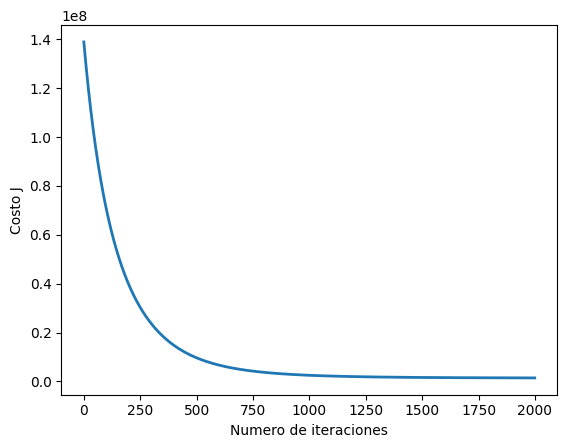

In [15]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003 # alpha = 0.003
num_iters = 2000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(14)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))



In [16]:
print(X_test)

        year  make  model  trim  body  transmission  state  condition  \
0         25    24    637   818    35             0      2        5.0   
1         25    24    637   818    35             0      2        5.0   
2         24     3      8   253    36             0      2       45.0   
3         25    51    575  1212    36             0      2       41.0   
4         24     3     33   335    36             0      2       43.0   
...      ...   ...    ...   ...   ...           ...    ...        ...   
558831    21     3     25   316    36             0      4       39.0   
558833    22    41      6   926    11             0     32        5.0   
558834    22     3    722  1489    35             0      2       48.0   
558835    25    36     63   102    76             0      5       38.0   
558836    24    14    256  1394    38             0      2       34.0   

        odometer  color  interior  seller      mmr  
0        16639.0     17         1    5943  20500.0  
1         9393.0 

In [35]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X_array = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [36]:
X_array = X_test.tail(10)
print(X_array)

        year  make  model  trim  body  transmission  state  condition  \
558824    23     2    573   946    48             0      4        5.0   
558825    21    46    278   122    79             1      2       41.0   
558826    24    23    329   848    35             0      2       44.0   
558827    24    23    329   840    35             0     25       42.0   
558828    22    10    328   366    28             0     10       37.0   
558831    21     3     25   316    36             0      4       39.0   
558833    22    41      6   926    11             0     32        5.0   
558834    22     3    722  1489    35             0      2       48.0   
558835    25    36     63   102    76             0      5       38.0   
558836    24    14    256  1394    38             0      2       34.0   

        odometer  color  interior  seller      mmr  
558824   20158.0     15         1    8608  43900.0  
558825   71693.0     15         1    9076  12300.0  
558826    9024.0      7         1    

In [50]:
# Normalizar las características utilizando mu y sigma calculados previamente
X_array_norm = (X_array - mu) / sigma

print(X_array_norm)

            year      make     model      trim      body  transmission  \
558824  0.729700 -1.374569  1.126457  0.458537  0.499529     -0.189432   
558825  0.206434  1.697072 -0.277245 -1.724295  2.265236      5.278939   
558826  0.991333  0.091441 -0.034571  0.198928 -0.240929     -0.189432   
558827  0.991333  0.091441 -0.034571  0.177736 -0.240929     -0.189432   
558828  0.468067 -0.816089 -0.039330 -1.077922 -0.639637     -0.189432   
558831  0.206434 -1.304759 -1.481099 -1.210376 -0.183971     -0.189432   
558833  0.468067  1.348022 -1.571507  0.405556 -1.607928     -0.189432   
558834  0.468067 -1.304759  1.835446  1.896981 -0.240929     -0.189432   
558835  1.252966  0.998972 -1.300283 -1.777276  2.094361     -0.189432   
558836  0.991333 -0.536849 -0.381928  1.645319 -0.070054     -0.189432   

           state  condition  odometer     color  interior    seller       mmr  
558824 -0.931165  -1.939826 -0.896114  0.837217 -0.703100  0.761498  3.153824  
558825 -1.122730   0.7696

In [55]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X_array_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [56]:

# Agregar una columna de unos en la primera columna de X_array_norm


# Calcular el precio predicho para los últimos 10 ejemplos
price = np.dot(X_array_norm, theta)

for i, price in enumerate(price):
  print('El precio predecido para el ejemplo {}: ${:.0f}'.format(i+1, price))
# Calcular el precio predicho para los ejemplos
#price = np.dot(X_array_norm, theta)

Se han truncado las últimas 5000 líneas del flujo de salida.
El precio predecido para el ejemplo 3650: $1282
El precio predecido para el ejemplo 3651: $6002
El precio predecido para el ejemplo 3652: $4758
El precio predecido para el ejemplo 3653: $5149
El precio predecido para el ejemplo 3654: $4470
El precio predecido para el ejemplo 3655: $9033
El precio predecido para el ejemplo 3656: $3194
El precio predecido para el ejemplo 3657: $6804
El precio predecido para el ejemplo 3658: $3107
El precio predecido para el ejemplo 3659: $7629
El precio predecido para el ejemplo 3660: $2787
El precio predecido para el ejemplo 3661: $2860
El precio predecido para el ejemplo 3662: $7403
El precio predecido para el ejemplo 3663: $3354
El precio predecido para el ejemplo 3664: $7207
El precio predecido para el ejemplo 3665: $4627
El precio predecido para el ejemplo 3666: $1001
El precio predecido para el ejemplo 3667: $1423
El precio predecido para el ejemplo 3668: $1809
El precio predecido para el

KeyboardInterrupt: 

In [91]:
# Estimar el precio ejemplo auto
X_array = [1, 24,	3,	33,	335,	36,	0,	431048,	2,	43.0,	2641.0,	7,1,	4090,	66000.0]
X_array_norm = (X_array[1:14] - mu) / sigma
print(X_array_norm)
price = np.dot(X_array_norm, theta[1:14])   # Se debe cambiar esto

print('El precio predecido para un auto (usando el descenso por el gradiente): ${:.0f}'.format(price))

year                0.991333
make               -1.304759
model              -1.443032
trim               -1.160043
body               -0.183971
transmission       -0.189432
state           41285.608592
condition          -2.165613
odometer           -1.283391
color             395.486740
interior            0.759251
seller             -1.744657
mmr                -1.022538
dtype: float64
El precio predecido para un auto (usando el descenso por el gradiente): $-2591315


In [107]:
# Cargar datos
#data = np.loadtxt('/content/drive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL 2024/LABORATORIOS/LAB 1/car_prices.csv', delimiter=',')
X_test = X[:]
#y_test = data['sellingprice']
df_sin_nulos = data.dropna()

# Seleccionar una columna específica como su valor
y_test = df_sin_nulos['sellingprice']

m = y_test.size
X_test = np.concatenate([np.ones((m, 1)), X], axis=1)
print(X_test)

[[1.000e+00 2.500e+01 2.400e+01 ... 1.000e+00 5.943e+03 2.050e+04]
 [1.000e+00 2.500e+01 2.400e+01 ... 0.000e+00 5.943e+03 2.080e+04]
 [1.000e+00 2.400e+01 3.000e+00 ... 1.000e+00 4.090e+03 3.190e+04]
 ...
 [1.000e+00 2.200e+01 3.000e+00 ... 1.000e+00 4.090e+03 2.980e+04]
 [1.000e+00 2.500e+01 3.600e+01 ... 1.000e+00 3.788e+03 1.510e+04]
 [1.000e+00 2.400e+01 1.400e+01 ... 6.000e+00 4.347e+03 2.960e+04]]


In [108]:
def normalEqn(X_test, y_test):

    theta = np.zeros(X_test.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X_test.T,X)),X_test.T),y_test)

    return theta

In [112]:
print(theta)

[ 1.36568813e+04  6.63160016e+01 -7.16000027e+01  5.34359164e+01
 -3.25838572e+01 -3.83401768e+01 -2.48638704e+01 -6.27371365e+01
  4.98015587e+02 -2.07084705e+02  2.18813877e+01  1.46129145e+01
 -2.41251085e+00  8.96000658e+03]


In [109]:
data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,25,24,637,818,35,0,342710,2,5.0,16639.0,17,1,5943,20500.0,21500.0
1,25,24,637,818,35,0,342704,2,5.0,9393.0,17,0,5943,20800.0,21500.0
2,24,3,8,253,36,0,430112,2,45.0,1331.0,7,1,4090,31900.0,30000.0
3,25,51,575,1212,36,0,462800,2,41.0,14282.0,17,1,11541,27500.0,27750.0
4,24,3,33,335,36,0,431048,2,43.0,2641.0,7,1,4090,66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,21,3,25,316,36,0,433214,4,39.0,66403.0,17,3,6216,20300.0,22800.0
558833,22,41,6,926,11,0,246107,32,5.0,54393.0,17,1,5344,30200.0,30800.0
558834,22,3,722,1489,35,0,337968,2,48.0,50561.0,1,1,4090,29800.0,34000.0
558835,25,36,63,102,76,0,163249,5,38.0,16658.0,17,1,3788,15100.0,11100.0


In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X_test, y_test);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 24,	3,	33,	335,	36,	0,	431048,	2,	43.0,	2641.0,	7,	1,	4090,	66000.0]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))